Import 

In [20]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pyaudio # no clue whether this is actually necessary
import speech_recognition as sr
from scipy.io.wavfile import write # possibly omit later

os.chdir("C:/users/remon/OneDrive/Bureaublad/BCN_ReMa2/User_Modelling")

Initialiaze recorder, and record some audio using the microphone. I used the word "Mozambique"

In [25]:
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    audio = r.listen(source)

Say something!


In [23]:
try:
    print(r.recognize_google(audio))
except LookupError:
    print("unintelligible")

Mozambique


write the audio to a wav-file, just to inspect it

In [10]:
with open("microphone-results.wav", "wb") as f:
    f.write(audio.get_wav_data())

Extract raw audio data from the audio object. Then convert to Numpy Array and write the audio to wav-file again to compare (in e.g. Audacity).

This seems to do its job.

In [21]:
rate = source.SAMPLE_RATE # retrieve sample rate

wav_data = audio.get_wav_data() # is an anti alias filter necessary here? 

# convert the  byte data to a NumPy array (assuming 16-bit PCM) --> need to check this out
audio_np = np.frombuffer(wav_data, dtype=np.int16)  

write('np_test.wav', rate, audio_np) # write out this file to compare with the wav.data created from the raw data.

Normalize and apply the short-time Fourier transform. I just followed the documentation here.

In [ ]:
# normalize the data to a floating point scale (-1.0 to 1.0)
audio_np_normalized = audio_np.astype(np.float32) / np.iinfo(np.int16).max

D = librosa.stft(audio_np_normalized)

# converted to decibel scale
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

Plot the spectogram. I just followed the documentation here.

C:\Users\remon\AppData\Local\Temp\ipykernel_23992\4059100958.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(D, sr=rate, x_axis='time', y_axis='log')


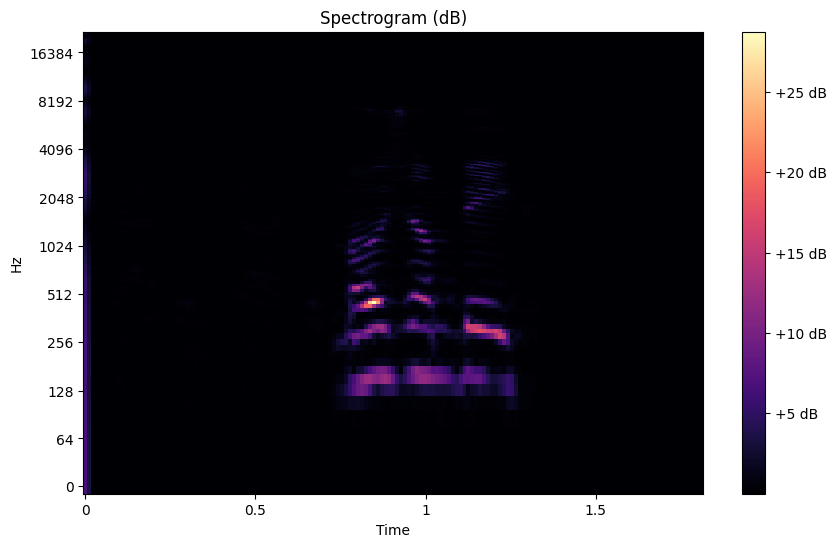

In [22]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=rate, x_axis='time', y_axis='log')  
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.show()